In [1]:
import pandas  as pd
from feature_selector import FeatureSelector
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.model_selection import train_test_split

data = pd.read_csv('train.csv')

train_labels = data.satisfied
train = data.drop(columns=['satisfied', 'id'])

fs = FeatureSelector(data = train, labels = train_labels)

fs.identify_all(selection_params = {'missing_threshold': 0.5,    
                                    'correlation_threshold': 0.8, 
                                    'task': 'classification',    
                                    'eval_metric': 'auc', 
                                    'cumulative_importance': 0.99})

#test_data = pd.read_csv('test.csv')
#test_data_select = test_data[selected_features]

/Users/weiyuan/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (3,4,6,10,12,18,24,35,56,57,65,85,86,87,88,89,98,99,100,105,124,125,126,127,128,130,131,133,166,171,172,192,193,194,195,204,205,206,207,228,229,230,240,256,257,258,259,260,261,262) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


9 features with greater than 0.50 missing values.

0 features with a single unique value.

1 features with a correlation magnitude greater than 0.80.

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[199]	valid_0's auc: 0.888075	valid_0's binary_logloss: 0.421407
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[116]	valid_0's auc: 0.891137	valid_0's binary_logloss: 0.416631
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[165]	valid_0's auc: 0.890052	valid_0's binary_logloss: 0.418057
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[133]	valid_0's auc: 0.889584	valid_0's binary_logloss: 0.419949
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[144]	valid_0's auc: 0.895749	valid_0's binary_logloss: 0.409153
Train

In [18]:
train_removed_all_once = fs.remove(methods = 'all', keep_one_hot = False)

train_new = train[list(train_removed_all_once.columns)]

['missing', 'single_unique', 'collinear', 'zero_importance', 'low_importance'] methods have been run

Removed 6273 features including one-hot features.


In [19]:
for column in train_new.columns:
    train_new[column].fillna("nan", inplace=True)

/Users/weiyuan/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [20]:

fs = FeatureSelector(data = train_new, labels = train_labels)

fs.identify_all(selection_params = {'missing_threshold': 0.5,    
                                    'correlation_threshold': 0.8, 
                                    'task': 'classification',    
                                    'eval_metric': 'auc', 
                                    'cumulative_importance': 0.99})


0 features with greater than 0.50 missing values.

0 features with a single unique value.

0 features with a correlation magnitude greater than 0.80.

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[141]	valid_0's auc: 0.893423	valid_0's binary_logloss: 0.412884
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[127]	valid_0's auc: 0.884572	valid_0's binary_logloss: 0.427577
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[104]	valid_0's auc: 0.885989	valid_0's binary_logloss: 0.425835
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[153]	valid_0's auc: 0.89567	valid_0's binary_logloss: 0.408634
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[218]	valid_0's auc: 0.892768	valid_0's binary_logloss: 0.412915
Traini

In [21]:
new_train_removed_all_once = fs.remove(methods = 'all', keep_one_hot = False)
new_train_removed_with_dummy = fs.remove(methods = 'all', keep_one_hot = True)

['missing', 'single_unique', 'collinear', 'zero_importance', 'low_importance'] methods have been run

Removed 6273 features including one-hot features.
['missing', 'single_unique', 'collinear', 'zero_importance', 'low_importance'] methods have been run

Removed 4858 features.


In [55]:
X = new_train_removed_with_dummy.drop(columns = new_train_removed_all_once.columns)
X.head()

,v1_0,v1_1,v1_10,v1_2,v1_3,v1_4,v1_5,v1_6,v1_7,v1_8,...,cntry_ES,cntry_FI,cntry_FR,cntry_GB,cntry_IE,cntry_LT,cntry_NL,cntry_NO,cntry_PL,cntry_SE
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
for c in X.columns:
    if ('nan' in c):
        print(c)

v58_nan
v87_nan
v95_nan
v96_nan
v97_nan
v104_nan
v126_nan
v132_nan
v256_nan


# 1. LGB

In [56]:
from sklearn.model_selection import KFold

#added some parameters
kf = KFold(n_splits = 10, shuffle = True, random_state = 2)
result = next(kf.split(X), None)
result1 = next(kf.split(train_labels), None)


X_train = X.iloc[result[0]]
y_train =  train_labels.iloc[result1[0]]
X_test = X.iloc[result[1]]
y_test =  train_labels.iloc[result1[1]]

In [57]:
import time
import lightgbm as lgb

train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test)


params = {'boosting_type': 'gbdt',
          'num_leaves': 80, #结果对最终效果影响较大，越大值越好，太大会出现过拟合
          'min_data_in_leaf': 30,
          'objective': 'binary', #定义的目标函数
          'max_depth': -1,
          'learning_rate': 0.05,
          "min_sum_hessian_in_leaf": 6,
          "boosting": "gbdt",
          "feature_fraction": 0.9,  #提取的特征比率
          "bagging_freq": 1,
          "bagging_fraction": 0.8,
          "bagging_seed": 11,
          "lambda_l1": 0.1,             #l1正则
          # 'lambda_l2': 0.001,     #l2正则
          "verbosity": -1,
          "nthread": -1,                #线程数量，-1表示全部线程，线程越多，运行的速度越快
          'metric': {'binary_logloss', 'auc'},  ##评价函数选择
          "random_state": 2019, #随机数种子，可以防止每次运行的结果不一致
          # 'device': 'gpu' ##如果安装的事gpu版本的lightgbm,可以加快运算
          }

start = time.time()
lgb2 = lgb.train(train_set=train_data,
                      early_stopping_rounds=10,
                      num_boost_round=1000,
                      params=params,
                      valid_sets=test_data)
end = time.time()
print('lightgbm运行时间为{}秒'.format(round(end-start,0)))

[1]	valid_0's auc: 0.864245	valid_0's binary_logloss: 0.670997
Training until validation scores don't improve for 10 rounds
[2]	valid_0's auc: 0.873372	valid_0's binary_logloss: 0.652387
[3]	valid_0's auc: 0.875298	valid_0's binary_logloss: 0.635573
[4]	valid_0's auc: 0.876071	valid_0's binary_logloss: 0.620135
[5]	valid_0's auc: 0.877814	valid_0's binary_logloss: 0.605641
[6]	valid_0's auc: 0.878378	valid_0's binary_logloss: 0.59249
[7]	valid_0's auc: 0.878904	valid_0's binary_logloss: 0.580696
[8]	valid_0's auc: 0.878784	valid_0's binary_logloss: 0.569922
[9]	valid_0's auc: 0.879952	valid_0's binary_logloss: 0.559394
[10]	valid_0's auc: 0.880417	valid_0's binary_logloss: 0.549879
[11]	valid_0's auc: 0.880825	valid_0's binary_logloss: 0.541193
[12]	valid_0's auc: 0.880868	valid_0's binary_logloss: 0.533382
[13]	valid_0's auc: 0.880799	valid_0's binary_logloss: 0.526353
[14]	valid_0's auc: 0.881128	valid_0's binary_logloss: 0.51954
[15]	valid_0's auc: 0.881187	valid_0's binary_logloss:

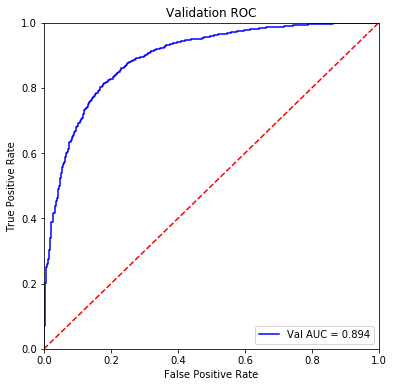

In [58]:
from sklearn import metrics
import matplotlib.pyplot as plt

lgb2_preds=lgb2.predict(X_test)
fpr, tpr, threshold = metrics.roc_curve(y_test, lgb2_preds)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('Validation ROC')
plt.plot(fpr, tpr, 'b', label = 'Val AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [61]:
from sklearn.metrics import accuracy_score 
    
def fbeta(y_true, pred):
    # 调整阈值
    best_acc=0
    precision_recall = []
    best_thershold=0
    for thershold in [0.15,0.2, 0.25,0.3,0.4,0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49,0.5,0.52125, 0.525, 0.55, 0.6, 0.65, 0.7]:
        preds = [1 if i > thershold else 0 for i in pred]
        cur_acc = accuracy_score(y_test, preds)
        if cur_acc > best_acc:
            best_thershold = thershold
            best_acc = cur_acc
            print(best_acc)
    return 'best_thershold', best_thershold,True

In [62]:
fbeta(y_test, lgb2_preds)

0.7247340425531915
0.761968085106383
0.785904255319149
0.796875
0.816156914893617
0.8174867021276596


('best_thershold', 0.44, True)